In [1]:
import os
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import bson
import cv2
import matplotlib.pyplot as plt

In [2]:
INPUT_PATH = os.path.join('..', 'input')
#CATEGORY_NAMES_DF = pd.read_csv(os.path.join(INPUT_PATH, 'category_names.csv'))
#TRAIN_DB = bson.decode_file_iter(open(os.path.join(INPUT_PATH, 'train.bson'), 'rb'))
#TEST_DB = bson.decode_file_iter(open(os.path.join(INPUT_PATH, 'test.bson'), 'rb'))

TRAIN_EXAMPLE_DB = bson.decode_file_iter(open(os.path.join(INPUT_PATH, 'train_example.bson'), 'rb'))

bson.decode_file_iter returns a generator

In [3]:
for item in TRAIN_EXAMPLE_DB:
    break
print(type(item), list(item.keys()))
print(item['_id'], len(item['imgs']), item['category_id'],)

<class 'dict'> ['category_id', '_id', 'imgs']
0 1 1000010653


this function decodes the images in TRAIN_EXAMPLE_DB

In [4]:
def decode(data):
    arr = np.asarray(bytearray(data), dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [6]:
import io
from PIL import Image

def decode_pil(data):
    return Image.open(io.BytesIO(data))

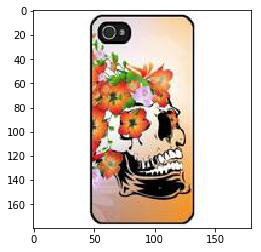

In [7]:
for img_dict in item['imgs']:
    img = decode(img_dict['picture'])
    plt.figure()
    plt.imshow(img)
    plt.show()